# Exploratory Data Analysis of Haberman's Cancer survival dataset 

***Overview*** <br>
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

***Objective***
Classify a new patients who had undergone surgery to one of the 2 classes(2,1) given the 3(age,year,nodes) features.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns
df=pd.read_csv('haberman.csv')


In [2]:
# shape of the dataframe
print(df.shape)

(306, 4)


data contains 306 rows and 4 columns

In [3]:
#Attribute information, howmany features ?
print (df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


***Observation :***  <br>
1> all the cloumns datatype is int <br>
    2> there are no missing values in data

In [5]:
#How many data points for each class are present? 
df['status'].value_counts()


1    225
2     81
Name: status, dtype: int64

***Observation :***  <br>
out of 306 patient 225 survived and 81 did not survived. <br>
classes are in integer variable, need to convert it into categorical datatype <br>
Dataset is imbalaced as there are 225 values for class 1 and only 81 for class 2

In [6]:
#Average age of patient
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


***Observation :***  <br> 
1> mean: mean of all the values present in column age,year,nodes respectively  : 52,65,4 <br>


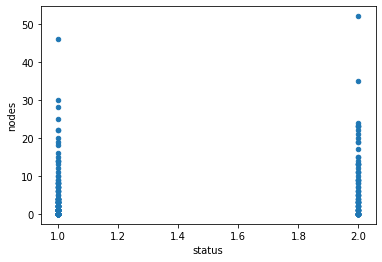

In [7]:
plt.show()
df.plot(kind='scatter',x='status',y='nodes')
plt.show()
#scater plot of status vs nodes does not make any sense, not able to figure out anything


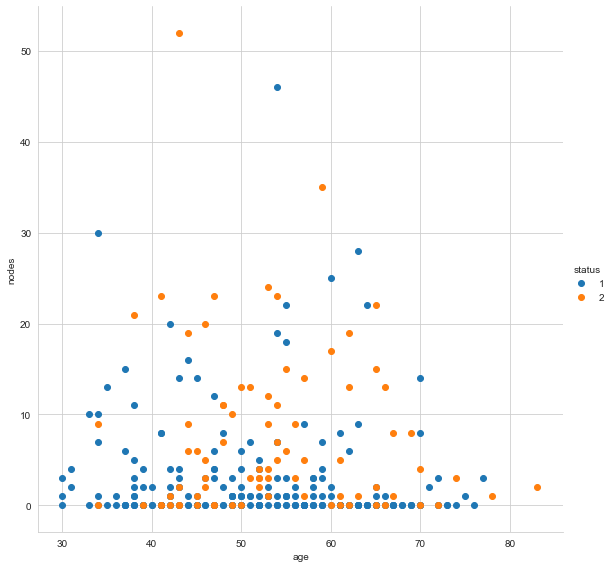

In [8]:
#Using seaborn to print coloured points 
sns.set_style('whitegrid')
g=sns.FacetGrid(df,hue='status',height=8)
g=g.map(plt.scatter,'age','nodes').add_legend();
#g=g.map(plt.scatter, 'nodes' ,'age',).add_legend();

plt.show()
#from the bellow graph we can not saperate classes. separating classes is much harder. 
# patient with 0 nodes have more chance of survival

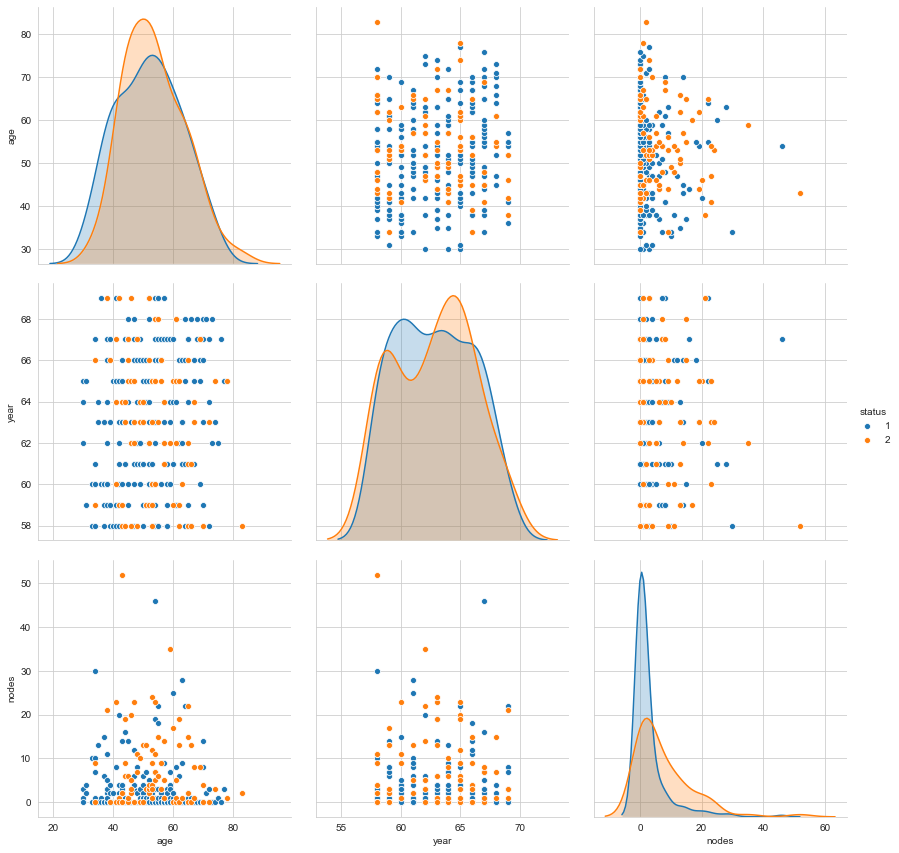

In [9]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df, vars=df.columns[:-1],hue='status',height=4)
plt.show()


***Observation :***  <br>
    
in most of the graphs, classes are overlapping except graph age vs nodes, which is not that much better but still it is better than the rest so I will choose Age and Node variables for further analysis


In [10]:
survived_GT5yrs=df[df['status']==1]
survived_GT5yrs.describe()

,age,year,nodes,status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [11]:
survived_LT5yrs=df[df['status']==2]
survived_LT5yrs.describe()

,age,year,nodes,status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


***Observation :***  <br> mean of long survival and short survival is differ by approx 5 <br> patient who survived longer have less no of nodes compare to short survived patients.


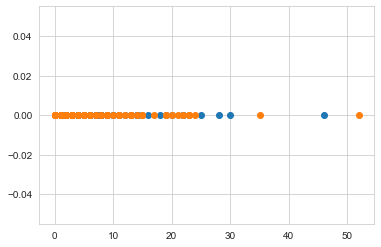

In [12]:
#will plot two different scatterplot for survived_GT5yrs,survived_LT5yrs for further analysis
#plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.close()
plt.plot(survived_GT5yrs['nodes'],np.zeros_like(survived_GT5yrs['nodes']),'o')
plt.plot(survived_LT5yrs['nodes'],np.zeros_like(survived_LT5yrs['nodes']),'o')
plt.show();

#from the below graph not able to figure out much as the values of survived_GT5yrs and survived_LT5yrs are ooverriding a lot 

***Observation :***  <br>
from the graph not able to figure out much as the values of survived_GT5yrs and survived_LT5yrs are overriding/overlapping a lot 

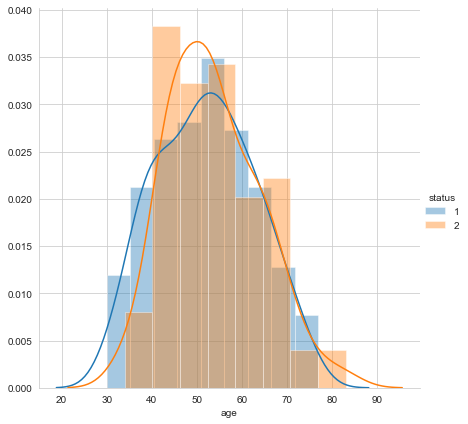

In [13]:
sns.FacetGrid(df,hue='status',height=6)\
.map(sns.distplot,'age')\
.add_legend()


***Observation :***  <br>
Above graph contains age range between 30 to 85. from the graph we can not predict anything because data points are overlapping. Even with the PDF of both classification overlap on each other 

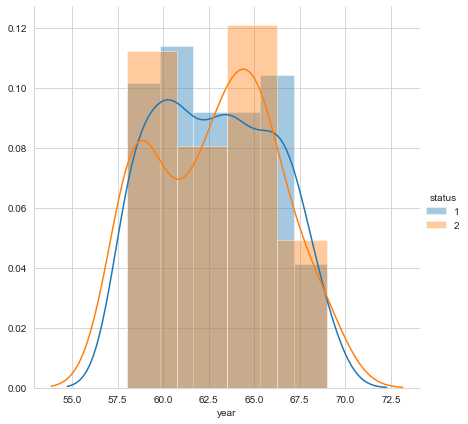

In [14]:
sns.FacetGrid(df,hue='status',height=6)\
.map(sns.distplot,'year')\
.add_legend()

#Almost similar as PDF of age, Here also we can not predict anything because there is almost equal number of density for every data point.

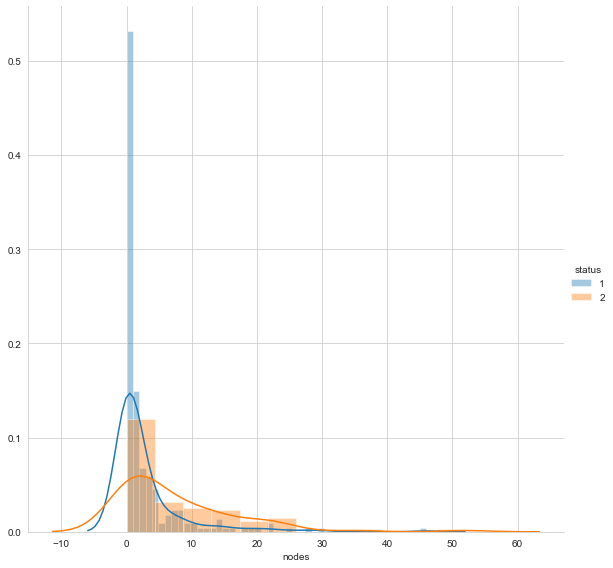

In [15]:
sns.FacetGrid(df,hue='status',height=8)\
.map(sns.distplot,'nodes')\
.add_legend()


***Observation :***  <br>

patient with less auxillary nodes survives longer, although the below graph does not make good classification but still it is better than any other i.e age,operation year <br>

we can conclude that <br>

if(nodes=0) <br>
patient will survive longer <br>
else if (nodes<8) <br>
patient survival chanes for five year are high <br>
else <br>
patient survival chanes for five year are low <br>


<br>

from the PDF we can classiy the patient survival status,
in order to check how much percenage of patient will live longer/shorter we will use CDF

0.2173913043478261
[0.18164251 0.0173913  0.00483092 0.0057971  0.00386473 0.00096618
 0.00193237 0.         0.         0.00096618]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
0.18164251207729468
0.8355555555555554
0.01739130434782609
0.08000000000000002
0.004830917874396136
0.022222222222222223
0.005797101449275362
0.026666666666666665
0.0038647342995169072
0.01777777777777777
0.0009661835748792276
0.004444444444444446
0.0019323671497584551
0.008888888888888892
0.0
0.0
0.0
0.0
0.0009661835748792268
0.004444444444444443


'\n\n\n'

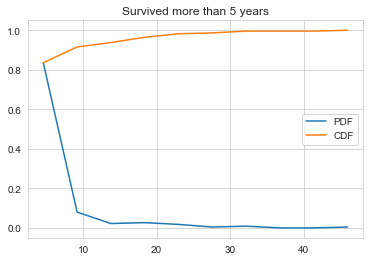

In [16]:
#We will draw/calculate CDF for the data survived_GT5yrs
#in order to calculate CDF, we have to first calculate PDF
#we will use np.histogram function argument information: 1>column name on which we want to construct PDF 2> no of bins, which will return bean and counts of auxillary nodes in every bean


counts,bin_edges=np.histogram(survived_GT5yrs['nodes'],bins=10,density=True) # 10 equal interval between min value of survived_GT5yrs['nodes'] and max value of survived_GT5yrs['nodes']
print(sum((counts)))
print(counts)
print(bin_edges)
PDF=counts/sum((counts)) # what is the probability of no. of occurence of auxillary nodes in  this particular bean out of total no. of occurences of auxillary nodes in all the beans
print(PDF)
plt.title('Survived more than 5 years')
plt.plot(bin_edges[1:],PDF, label='PDF' )
CDF=np.cumsum(PDF)#Cumulative is the total probability of anything below it.
plt.plot(bin_edges[1:],CDF,label='CDF' )
plt.legend()
for i in range(10):
    print(counts[i])
    print (counts[i]/sum(counts))

    
    
    # CDF : states that how many percentage of patient have X no of auxillry nodes at point X
    
"""


"""

***Observation :***  <br>

1> Above CDF is states long survival <br>
2> Among the patients who survived for more than 5 years, <br>
there are 85% who have nodes<=4, <br>
so we can say that there is 85% chance of long survival if the patient has <=4 nodes <br>
3> 100% of patients have less than 40 nodes that means 100% patients have less survival chances if nodes are >40 <br>
AS the no of nodes increases chances of long survival decreases <br>

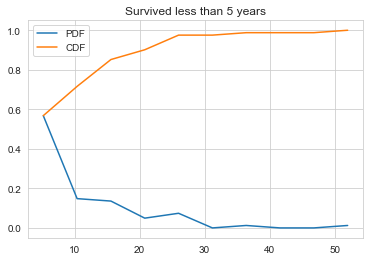

In [17]:
counts,bean_edges=np.histogram(survived_LT5yrs['nodes'],bins=10,density=True);
PDF=counts/sum(counts)
CDF=np.cumsum(PDF)
plt.title('Survived less than 5 years')
plt.plot(bean_edges[1:],PDF, label='PDF')
plt.plot(bean_edges[1:],CDF,label='CDF')
plt.legend()
plt.show()

***Observation :***  <br>

1> Above graph plots CDF of short survived patients <br>
2> Among the patients who survived for less than 5 years, <br>
we can say that there are 55% patients having nodes <=4 <br>
and nearly 100% patient with nodes<40 <br>
there are 100% patient in short survival if nodes >40  <br>

In [18]:
#without plotting any graph we can also analyse the data with mean,variance and std dev
print('Means:')
print(np.mean(survived_LT5yrs['nodes']))
print(np.mean(survived_GT5yrs['nodes']))

print('\nstd dev:')
print(np.std(survived_LT5yrs['nodes']))
print(np.std(survived_GT5yrs['nodes']))
 


Means:
7.45679012345679
2.7911111111111113

std dev:
9.128776076761635
5.857258449412138


***Observation :***  <br>

we can notice that mean of short survival is 7.45 which is way higher than the mean of log survival <br>
that means probability of short surviavl is higher <br>
std dev for short survival is more, that means spread of data for short surival is more <br>
from the mean and std dev of short survival we can say that majority of nodes lies between 7.75+9.12 &  7.75-9.12


In [19]:
print('\nMedians :')
print('<5 : ',np.median(survived_LT5yrs['nodes']))
print('>5 : ',np.median(survived_GT5yrs['nodes']))

print('\n quntiles')
print('<5 : ',np.percentile(survived_LT5yrs['nodes'],np.arange(0, 100, 25)))
print('>5 : ',np.percentile(survived_GT5yrs['nodes'],np.arange(0, 100, 25)))

print('\n 90th percentile')
print('<5 : ',np.percentile(survived_LT5yrs['nodes'],90))
print('>5 : ',np.percentile(survived_GT5yrs['nodes'],90))

"""

"""


Medians :
<5 :  4.0
>5 :  0.0

 quntiles
<5 :  [ 0.  1.  4. 11.]
>5 :  [0. 0. 0. 3.]

 90th percentile
<5 :  20.0
>5 :  8.0


'\n\n'

***Observation :***  <br>

1> Median for long survival is 0, that means patient with 0 nodes detected lives longer <br>
2> 75th% of long survival is 3 that means, there are 25% patients who have more than 3 nodes detected and 75% have >=3 nodes detected <br>
whereas 75th% of short survival is 11 <br>
3> 90th% of short survival is 20 nodes are detected, that means there are 10% of patient with more than 20 nodes detected
whereas in long survival there are 10% patients with nodes >8 <br>


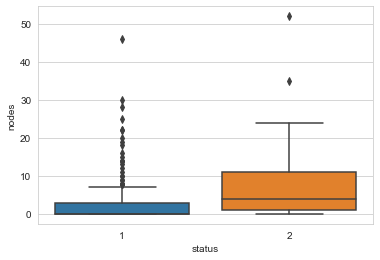

In [20]:
sns.boxplot(x='status',y='nodes',data=df)
plt.show()

***Observation :***  <br>


1> long survival: <br> 
1.1> most of the auxillary nnodes lies between 0 to 8. <br>
1.2> <br>
2> short survival : most of the auxillary nodes lies between 0 to 25.<br>
2.1> approx 25th percentile of short survival is 50th% of long survival<br>
2.2> there are less no of outliers compared to long survival <br>
2.3> short survival also contains small percentage of patient with 0-2 nodes. <br>


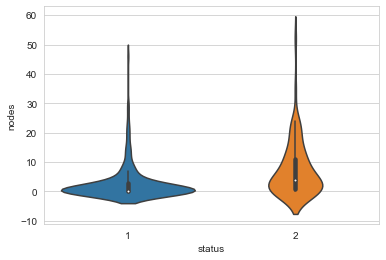

In [21]:
sns.violinplot(x='status',y='nodes',data=df,height=8)
plt.show()

***Observation :***  <br>

1> short survival: <br>
1.1> Denisty is more near 0. that means there are more no of patient with 0 positive nodes. <br>
1.2> whiskers are spread aprox between 0 to 7 <br>
2> Long survival: <br>
1.1> Density is more around nodes 0 to 10. <br>
1.2> Whiskers are spread between o to 20 <br>

From the violinplot and boxplot : <br>

1> There are still small percentage of patient with 0 to 2 positive nodes are present in the list of short survived patient. so we can not say that patient with 0 positive auxillary nodes will leave longer i.e there is no gurrantee of long survival even if with o positive auxillary nodes.


<br>

As the given data is imbalanced, classifying survival status of new patient is difficult task with the given features 

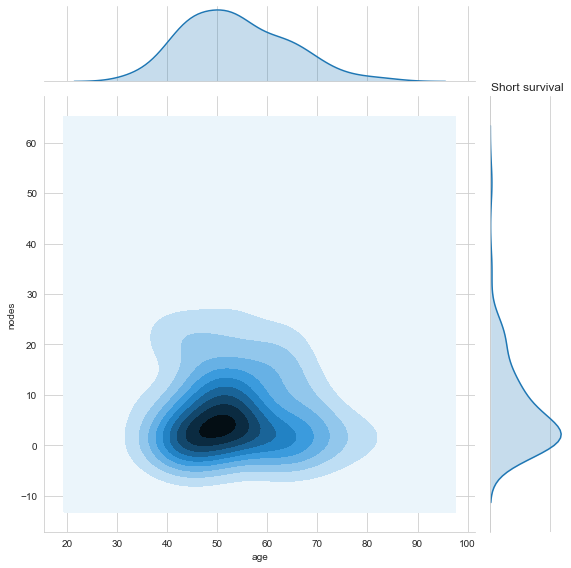

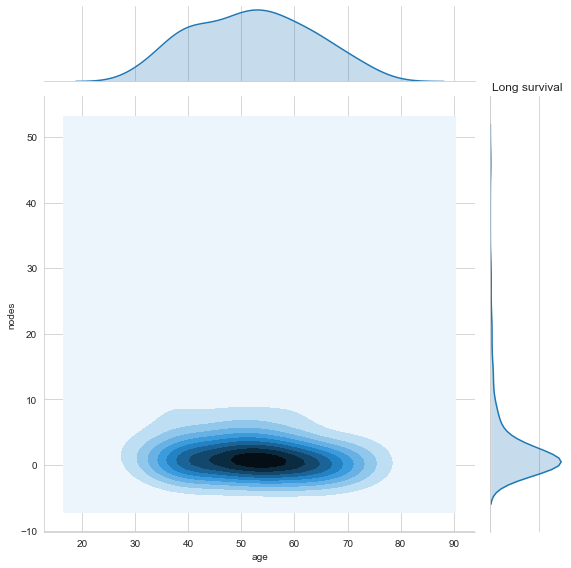

In [22]:
sns.jointplot(x='age',y='nodes',data=survived_LT5yrs,kind='kde',height=8)
plt.grid()
plt.title('Short survival')
plt.show()
sns.jointplot(x='age',y='nodes',data=survived_GT5yrs,kind='kde',height=8)
plt.title('Long survival')
plt.grid()
plt.show()

***Observation :***  <br>

<br>The dark area have major density which is hill top in 3D and density is getting low as graph get lighter. Each shade represent 1 contour plot. <br>

1>short survival : <br>
density is more from age range 47–58 and axillary nodes from 0–7. <br>
2>Long Survival : <br>
density is more from age range 47–60 and axillary nodes from 0–2. 

***Ref :***  <br> https://towardsdatascience.com/